In [24]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
import math
# plt.style.use('dark_background')
from mog_fit import data
from collections import OrderedDict
from sklearn import preprocessing
from sklearn.feature_extraction.image import extract_patches_2d

import torch
from torch.autograd import Variable
from mog_analyze import viz
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import entropy
from scipy.stats import ks_2samp

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load in imagenet dset

In [63]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

# Data loading code
data_dir = '/scratch/users/vision/data/cv/imagenet_full'
traindir = os.path.join(data_dir, 'train')
valdir = os.path.join(data_dir, 'val')

batch_size = 5
num_workers = 1

loader_ims = torch.utils.data.DataLoader(
    dset.ImageFolder(valdir, transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()])),
    batch_size=batch_size, shuffle=False, 
    num_workers=num_workers, pin_memory=True)

In [64]:
x = next(iter(loader_ims))
im = x[0][0].numpy().transpose(1, 2, 0)

In [65]:
patches = extract_patches_2d(im, (7, 7), max_patches=None, random_state=None).astype(np.float64)
print(patches.shape)
patch_sum = patches.mean(axis=0)
print(np.unique(patch_sum))

(47524, 7, 7, 3)
[0.71651097 0.71656766 0.7166373  0.71671454 0.71675671 0.71679029
 0.7168096  0.71687611 0.71688511 0.71695087 0.71696218 0.71702481
 0.71702745 0.71707787 0.7171164  0.71714116 0.71718918 0.71721377
 0.71728292 0.71728548 0.71732996 0.71737427 0.71738929 0.71744367
 0.71745827 0.71746636 0.71750778 0.71752619 0.71756307 0.7175648
 0.71760128 0.71761052 0.7176276  0.71765227 0.71767579 0.71768371
 0.71769097 0.71771234 0.71771507 0.71776153 0.71777019 0.71777068
 0.71781533 0.71783026 0.71784347 0.71786715 0.71789768 0.71793605
 0.71798845 0.72325803 0.72330886 0.72332255 0.72337149 0.72337545
 0.7233856  0.72340111 0.72341778 0.72342042 0.72343602 0.72344872
 0.72345013 0.72345599 0.72346011 0.7234668  0.723471   0.72350558
 0.7235083  0.72350921 0.72350946 0.72351102 0.72352216 0.72352844
 0.72356491 0.72356516 0.72357176 0.72358026 0.72358282 0.72358372
 0.72361244 0.72363068 0.72363208 0.72363431 0.72365262 0.72365593
 0.72366822 0.72368794 0.72369471 0.72370156 0

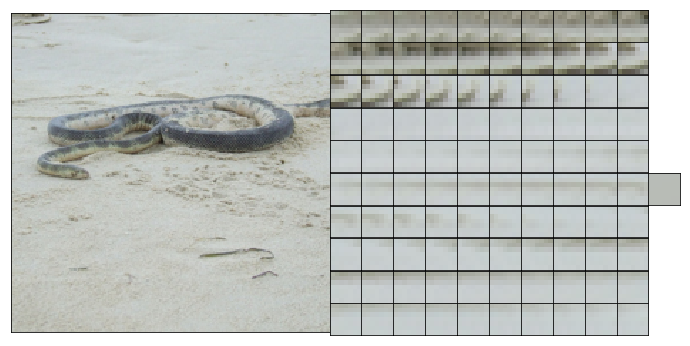

In [66]:
plt.figure(figsize=(12, 6))
R, C = 1, 2
D = 10
ax1 = plt.subplot2grid((R * D, C * D + 1), (0, 0), colspan=D, rowspan=D)
ax1.imshow(im)
plt.xticks(())
plt.yticks(())

for i, comp in enumerate(patches[:100]):
    ax = plt.subplot2grid((R * D, C * D + 1), (i // 10, D + i % 10))
    ax.imshow(comp, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    
ax = plt.subplot2grid((R * D, C * D + 1), (5, 20))    
ax.imshow(patch_sum, interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()